In [1]:
import pandas as pd 
import numpy as np 

In [254]:
df = pd.read_csv("../../data/history/AHRNW.csv")
# df = pd.read_csv("GOOG.csv")
df["ds"] = pd.to_datetime(df.time)
df["y"] = df["close_price"]
# df['ds'] = pd.to_datetime(df.Date)
# df['y'] = df['Close']
df = df[["y", "ds"]]
df

,y,ds
0,0.330,2022-02-04 05:00:00
1,0.300,2022-02-07 05:00:00
2,0.300,2022-02-08 05:00:00
3,0.340,2022-02-09 05:00:00
4,0.400,2022-02-10 05:00:00
5,0.325,2022-02-11 05:00:00
6,0.340,2022-02-14 05:00:00
7,0.330,2022-02-15 05:00:00
8,0.320,2022-02-16 05:00:00
9,0.310,2022-02-17 05:00:00


In [225]:
df = pd.concat([df, pd.DataFrame({"ds": (pd.date_range(df.ds.min(), df.ds.max())).difference(df.ds), 
                       "y": np.NaN})])
df = df.sort_values(by="ds")
df = df.fillna(method = 'pad').reset_index(drop = True)

In [226]:
split = int(len(df)*0.75)
train = df.iloc[:split]
test = df.iloc[split - 10:]

In [227]:
from neuralprophet import NeuralProphet
prophet = NeuralProphet(
    n_forecasts=30,
    n_lags=20,
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    batch_size=24,
    normalize = 'standardize', 
    epochs=500,
    learning_rate=0.01,
)

# prophet = NeuralProphet(
#     batch_size = 10,
#     learning_rate = 0.05,
#     normalize = 'standardize', 
#     impute_missing=True, 
#     epochs = 1000
# )

metrics = prophet.fit(train, freq = "D")

Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [00:22<00:00, 22.23it/s, SmoothL1Loss=0.0337, MAE=0.225, RMSE=0.385, RegLoss=0]


In [242]:
forecast = prophet.predict(test)
forecast = forecast[60:]

In [250]:
y = forecast.y
yhat = forecast.yhat5
x = forecast.ds

In [251]:
yhat

60        26.184
61     26.202625
62      26.13446
63     26.064344
64     26.095026
         ...    
200    25.954607
201    25.938349
202     25.89744
203    25.822342
204    25.946342
Name: yhat5, Length: 145, dtype: object

In [179]:
empty_test = test.copy()
empty_test.y = np.NaN

In [252]:
MSE(y, yhat)
r2(y, yhat)

-1.807140434221734

In [95]:
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt

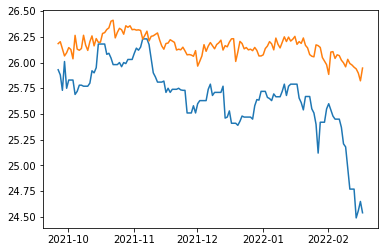

In [253]:
plt.plot(x, y)
plt.plot(x, yhat)

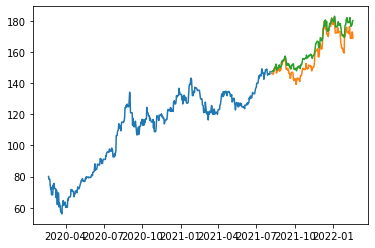

In [169]:
plt.plot(train['ds'], train['y'])
plt.plot(x, y)
plt.plot(x, yhat)

In [194]:
df_future = prophet.make_future_dataframe(train, periods=1)
prophet.predict(df_future)

WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 10.


ValueError: need at least one array to concatenate

In [193]:
df_future

,y,ds
0,144.98,2021-07-28 05:00:00
1,145.64,2021-07-29 04:00:00
2,145.64,2021-07-29 05:00:00
3,145.86,2021-07-30 04:00:00
4,145.86,2021-07-30 05:00:00
5,145.86,2021-07-31 05:00:00
6,145.86,2021-08-01 05:00:00
7,145.52,2021-08-02 04:00:00
8,145.52,2021-08-02 05:00:00
9,147.36,2021-08-03 04:00:00
